In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Name of file with calibration data
cal_file = "9_28_21/9_28_21_calibration2.lvm"

# Load data with pandas read_csv function
cal_data = pd.read_csv(
    cal_file,      # load file
    sep = '\t',    # define separator
    skiprows = 23, # skip labview junk
    usecols=np.arange(1,7), # select columns with relevant data
    names = [      # rename columns for make_regression function
        'yellow_g', 'red_g', 'blue_g', # gauges
        'yellow_p', 'red_p', 'blue_p', # pots
    ]
)

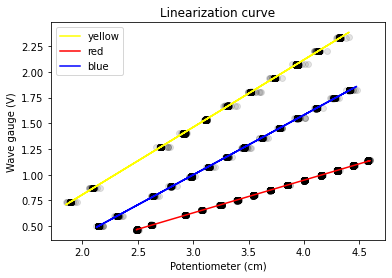

In [3]:
def make_regression(data, color, plot = True):
    """
    Uses sklearn linear regression tool to make linear models for each wave gauge
        data - pandas DataFrame with specific column naming convention
        color - color of wave gauge/pot unit
        plot - decides whether or not to make a plot of the result
    Returns: 
        Linear regression model
        
    """
    X = data.loc[:, color + "_g"].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.loc[:, color + "_p"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()
    model = linear_regressor.fit(X, Y)
    
    if plot:
        plt.scatter(X, Y, color = 'k', alpha = 0.1)
        plt.plot(X, model.predict(X), color = color, label = color)
        plt.xlabel("Potentiometer (cm)")
        plt.ylabel("Wave gauge (V)")
        plt.title("Linearization curve")
        plt.legend()
    return model

yellow_model = make_regression(cal_data, "yellow")
red_model = make_regression(cal_data, "red")
blue_model = make_regression(cal_data, "blue")

(5000.0, 12000.0)

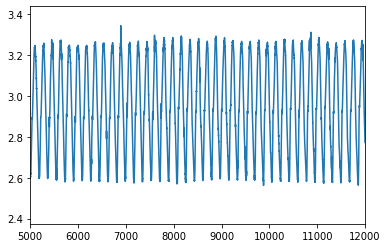

In [7]:
data_file = "9_28_21/9_28_21_waves_5_1.8.lvm"
wave_data = pd.read_csv(
    data_file,
    sep = '\t', 
    skiprows = 23, 
    usecols = [1,2,3], 
    names = ['yellow', 'red', 'blue']
)

plt.plot(wave_data["yellow"])
plt.xlim([5000, 12000])

In [8]:
X = data.loc[:, color + "_g"].values.reshape(-1, 1)  # values converts it into a numpy array

NameError: name 'data' is not defined

ValueError: Expected 2D array, got 1D array instead:
array=[3.133506].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

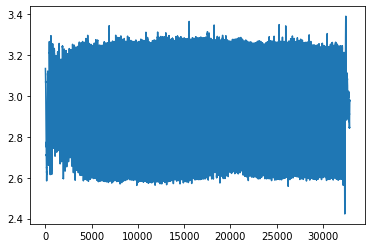

In [15]:
X = wave_data.loc[:, 'yellow'].values.reshape(-1, 1)
# Y = yellow_model.predict(X)
plt.plot(X)
m = []
for el in X:
    m.append(yellow_model.predict(el))
# plt.plot(wave_data["yellow"])

In [20]:
m = []
for col in X: 
    for el in col:
        m.append(yellow_model.predict(np.array([[el]])))

ValueError: x and y can be no greater than 2-D, but have shapes (32910, 1) and (32910, 1, 1)

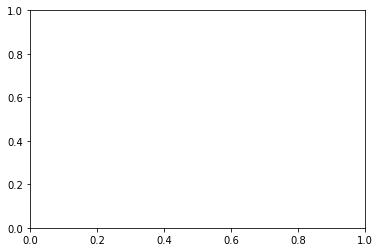

In [26]:
plt.plot(X, m)

In [28]:
1/15

0.06666666666666667

In [27]:
np.sqrt(1/15)

0.2581988897471611

In [34]:
(15)**3.5

13071.318793450033

In [32]:
0.258**2

0.066564